In [79]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [96]:
im = cv2.imread('nike.jpg')
img = im.copy()
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [97]:
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [98]:
im = cv2.drawContours(img, contours, -1, (255,0,0), 3)

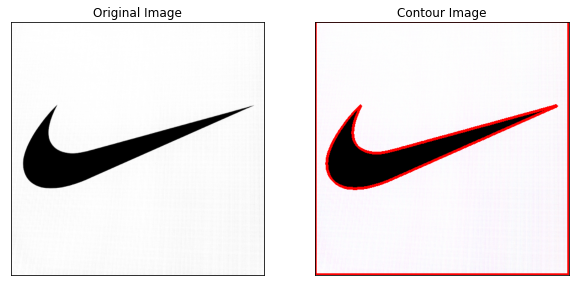

In [99]:
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(imgray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(im,cmap = 'gray')
plt.title('Contour Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [100]:
cnt = contours[1]
M = cv2.moments(cnt)
print (M)

{'m00': 16150.0, 'm10': 2399812.333333333, 'm01': 3780120.833333333, 'm20': 506679579.3333333, 'm11': 531294051.75, 'm02': 901225345.1666666, 'm30': 130487479224.70001, 'm21': 105811055113.41667, 'm12': 120210551109.15, 'm03': 218474409557.75, 'mu20': 150079007.49316138, 'mu11': -30413725.17406249, 'mu02': 16438130.640307903, 'mu30': 10595292856.569534, 'mu21': -3745326813.0137405, 'mu12': 530267137.3815384, 'mu03': -164410441.10488892, 'nu20': 0.5754066750114019, 'nu11': -0.11660698434399827, 'nu02': 0.06302420473811846, 'nu30': 0.31965510786993656, 'nu21': -0.11299478576278803, 'nu12': 0.015997915422836025, 'nu03': -0.004960187320706383}


In [101]:

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])


In [102]:
(w,h,c) = img.shape

In [103]:
img = np.zeros(im.shape,np.uint8)
img =cv2.circle(img,(cx,cy),3,(255,255,0),2)
img =cv2.drawContours(img,contours[1],-1,(255,0,0),3)

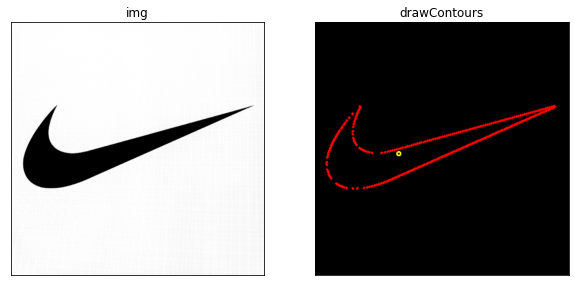

In [104]:
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(imgray,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('drawContours'), plt.xticks([]), plt.yticks([])
plt.show()

4. Contour Approximation

In [112]:
epsilon = 0.001*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [113]:
imgA = np.zeros(im.shape,np.uint8)
imgA = cv2.drawContours(imgA,approx,-1,(0,255,0),3)

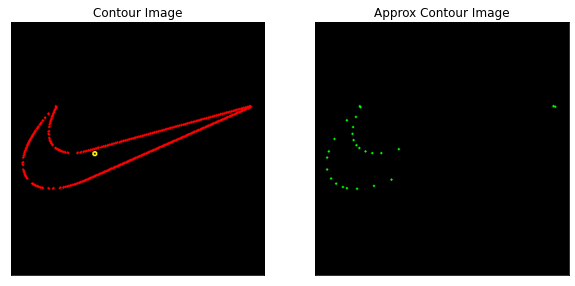

In [114]:
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Contour Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgA,cmap = 'gray')
plt.title('Approx Contour Image'), plt.xticks([]), plt.yticks([])
plt.show()

Convex Hull

In [144]:
hull = cv2.convexHull(cnt)

In [145]:
imgH = np.zeros(im.shape,np.uint8)
imgH = cv2.drawContours(img,[hull],-1,(0,255,0),3)

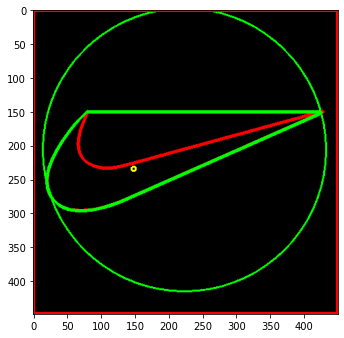

In [146]:
plt.figure(figsize=(12,9))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.show()